In [12]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
bank_data = pd.read_csv("C://R Dataset Folder//credit risk data 1.csv")


In [9]:
bank_data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
## CHECK THE SUMMARY OF DATA

bank_data.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,5.253400e+04,65535.000000,65535.000000,65535.000000,65535.000000,63806.000000
mean,32768.000000,0.066911,5.091486,52.195148,0.423819,363.072282,6.609616e+03,8.413993,0.269139,1.017258,0.242679,0.759944
std,18918.469283,0.249869,209.579093,14.790427,4.219182,2453.180045,8.933778e+03,5.135781,4.194458,1.131195,4.181832,1.117304
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16384.500000,0.000000,0.029803,41.000000,0.000000,0.174007,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,32768.000000,0.000000,0.156481,52.000000,0.000000,0.365817,5.388000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,49151.500000,0.000000,0.564614,63.000000,0.000000,0.869070,8.238500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,65535.000000,1.000000,29110.000000,107.000000,98.000000,329664.000000,1.072500e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
## CHECK THE TYPE OF DATA

bank_data.dtypes

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [12]:
## REMOVE THE FIRST COLUMN

bank_data = bank_data.drop(["ID"],axis = 1)


In [13]:
## SEPARATE THE SERIOUSDLQIN BEFORE REPLACE THE MISSING VALUE WITH MEAN AND MEDIAN (AS IT IS CATEGORICAL VARIABLE SO NO NEED 
## TO APPLY ANY STATISTICS OVER THERE)

bank_data1 = bank_data[["SeriousDlqin2yrs"]]

In [14]:
## NOW REMOVE SERIOUS DELQIN FROM MAIN DATASET

bank_data2 = bank_data.drop(["SeriousDlqin2yrs"],axis = 1)

In [15]:
## DATA CLEANING

bank_miss = bank_data2.columns[bank_data2.isnull().any()]
bank_miss

Index(['MonthlyIncome', 'NumberOfDependents'], dtype='object')

In [16]:
## FIND MEDIAN TO REPLACE MISSING VALUE (MEAN IS NOT WORKING)

bank_med = bank_data2.median()
bank_med

RevolvingUtilizationOfUnsecuredLines       0.156481
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.365817
MonthlyIncome                           5388.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [18]:
## FIND MEDIAN TO REPLACE MISSING VALUE (MEAN IS NOT WORKING HERE)

bank_imputed = bank_data2.fillna(bank_data2.median())
bank_imputed.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [20]:
## AGAIN ADD SERIOUSDELQIN AND CONVERT IT INTO STRING FROM INTEGER

bank_imputed["SeriousDlqin2yrs"]=bank_data1

In [21]:
x = bank_imputed.columns.values
x

array(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'SeriousDlqin2yrs'], dtype=object)

In [22]:
## RECHECK THE COLUMNS

bank_re = bank_imputed.columns[bank_imputed.isnull().any()]
bank_re

Index([], dtype='object')

In [24]:
### OUTLIER DETECTION

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

RevolvingUtilizationOfUnsecuredLines        AxesSubplot(0.125,0.71587;0.227941x0.16413)
age                                      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
NumberOfTime30-59DaysPastDueNotWorse     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
DebtRatio                                  AxesSubplot(0.125,0.518913;0.227941x0.16413)
MonthlyIncome                           AxesSubplot(0.398529,0.518913;0.227941x0.16413)
NumberOfOpenCreditLinesAndLoans         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
NumberOfTimes90DaysLate                    AxesSubplot(0.125,0.321957;0.227941x0.16413)
NumberRealEstateLoansOrLines            AxesSubplot(0.398529,0.321957;0.227941x0.16413)
NumberOfTime60-89DaysPastDueNotWorse    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
NumberOfDependents                            AxesSubplot(0.125,0.125;0.227941x0.16413)
SeriousDlqin2yrs                           AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

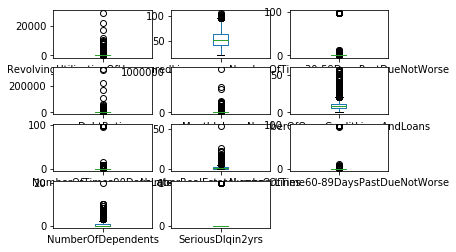

In [26]:
#### THIS CODE IS NOT INCLUDED IN ALGORITHM. I HAVE DONE IT TO GET HOW TO CHECK THE OUTLIER OF EACH VARIABLE


bank_imputed.plot(kind = "box",subplots = True,layout = (4,3),sharex = False, sharey = False)

In [19]:
### ADD SERIOUSDELQIN IN THE MAIN DATASET AFTER THE TREATMENT OF OUTLIER ###

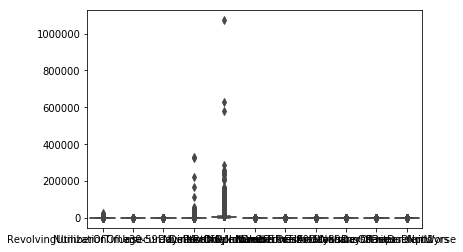

In [27]:
## RECCHECKING OF OUTLIER

sns.boxplot(data = bank_imputed)

In [28]:
bank_imputed1 = bank_data[["DebtRatio","MonthlyIncome"]]

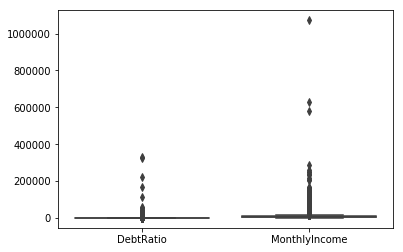

In [29]:
sns.boxplot(data = bank_imputed1)

In [23]:
## OUTLIER TREATMENT

q1 = bank_imputed["MonthlyIncome"].quantile(.25)
q3 = bank_imputed["MonthlyIncome"].quantile(.75)

iqr = q3-q1
print(iqr)


3477.0


In [24]:
lb = q1-iqr*1.5
lb

-1310.5

In [25]:
ub = q3+iqr*1.5
ub

12597.5

In [26]:
## OUTLIER TREATMENT

bank_imputed["MonthlyIncome"] = np.where(bank_imputed["MonthlyIncome"]< lb, lb, bank_imputed["MonthlyIncome"])

In [27]:
bank_imputed["MonthlyIncome"] = np.where(bank_imputed["MonthlyIncome"]> ub, ub, bank_imputed["MonthlyIncome"])

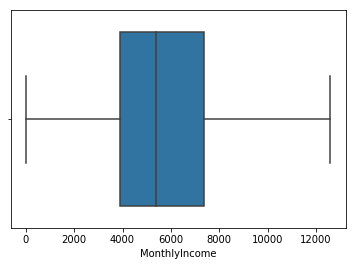

In [28]:
sns.boxplot(data = bank_imputed, x= "MonthlyIncome")

In [29]:
q1 = bank_imputed["DebtRatio"].quantile(.25)
q3 = bank_imputed["DebtRatio"].quantile(.75)

iqr = q3-q1
print(iqr)

0.6950634735000001


In [30]:
lb = q1-iqr*1.5
lb

-0.8685886032500001

In [31]:
ub = q3+iqr*1.5
ub

1.91166529075

In [32]:
## TREAT THE OUTLIER OF SECOND VARIABLE

bank_imputed["DebtRatio"] = np.where(bank_imputed["DebtRatio"]< lb, lb, bank_imputed["DebtRatio"])

In [33]:
bank_imputed["DebtRatio"] = np.where(bank_imputed["DebtRatio"]> ub, ub, bank_imputed["DebtRatio"])

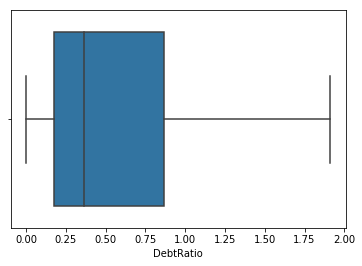

In [34]:
## CHECK THE OUTLIER AFTER TREATMENT

sns.boxplot(data = bank_imputed, x = "DebtRatio")

In [35]:
## TO SAVE THE FILE INTO CSV FORMAT

bank_imputed.to_csv("C://Users//Jaspreet//Documents//PYTHON DATASET FOLDER//bank_imputed.csv")

bank_data.to_csv()

In [36]:
### RANDOM FOREST CLASSIFIER ###

In [17]:
bank_data = pd.read_csv(r"D:\Works Stuffs\Misc\Datasets\Bank Dataset\bank_imputed.csv")

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
bank_1 = bank_data.columns.values
bank_1

array(['Unnamed: 0', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'SeriousDlqin2yrs'], dtype=object)

In [18]:
bank_data.shape

(65535, 12)

In [8]:
X = bank_data[['RevolvingUtilizationOfUnsecuredLines','age',,'DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]
y = bank_data['SeriousDlqin2yrs']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

## 70% for training and 30% for testing

In [19]:
## CREATE THE GAUSSIAN CLASSIFIER

clf = RandomForestClassifier(n_estimators = 100)

## TRAIN THE MODEL USING THE TRAINING DATASET

clf.fit(X_train,y_train)

train_pred = clf.predict(X_train)

# MODEL EVALUATION

y_pred = clf.predict(X_test)



In [20]:
## CHECK THE ACCURACY OF TRAINING DATASET

print("Accuracy:",metrics.accuracy_score(train_pred,y_train))

Accuracy: 0.9993024371103457


In [21]:
## CHECK THE ACCURACY OF TESTING DATASET 
## MODEL ACCURACY : HOW OFTEN IS THE CLASSIFIER CORRECT?

print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.9343878744723055


In [43]:
### FEATURE SELECTION (SELECTION OF IMP. VARIABLE)
### THIS IS ONE OF THE MAIN ADVANTAGE OF RANDOM FOREST

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split
#  from sklearn.model_selection import SelectFromModel

In [44]:
## CREATE GAUSSIAN CLASSSIFIER

clf1 = RandomForestClassifier(n_estimators = 100)

## TRAIN THE MODEL BY USING THE TRAINING DATASETs y_pred = clf.predict(X_test)
## IT MEANS BY TRAIN THE MODEL WE WILL USE IT TO PREDICT ON X_TEST i.e PREDICTED VALUES

clf1.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
### RANDOM FOREST ON IMPORTANT FEATURES(INDEPENDENT VARIABLE)
# feature_importance_
### here you can use train as well as test dataset but most preferable is training dataset

fi = pd.DataFrame({'feature':list(X_train),
                  'importance': clf1.feature_importances_}).\
                   sort_values('importance',ascending = False)
fi

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.192145
3,DebtRatio,0.147305
4,MonthlyIncome,0.141428
1,age,0.140969
5,NumberOfOpenCreditLinesAndLoans,0.095983
6,NumberOfTimes90DaysLate,0.095165
2,NumberOfTime30-59DaysPastDueNotWorse,0.051845
8,NumberOfTime60-89DaysPastDueNotWorse,0.049182
9,NumberOfDependents,0.046130
7,NumberRealEstateLoansOrLines,0.039847


In [46]:
## IMPORT TRAIN TEST SPLIT
## SELECT THE COLUMNS WITH HIGHEST VALUES
from sklearn.model_selection import train_test_split

X = bank_imputed[["RevolvingUtilizationOfUnsecuredLines","DebtRatio","age","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfTimes90DaysLate"]]

y = bank_imputed["SeriousDlqin2yrs"]


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 5)

In [48]:
clf2 = RandomForestClassifier(n_estimators = 100)

clf2.fit(X_train,y_train)

train1_pred = clf2.predict(X_train)

y_pred = clf2.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(train1_pred,y_train))

Accuracy: 0.998779264943105


In [50]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.933014597426377


In [52]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18144   190]
 [ 1127   200]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18334
           1       0.51      0.15      0.23      1327

   micro avg       0.93      0.93      0.93     19661
   macro avg       0.73      0.57      0.60     19661
weighted avg       0.91      0.93      0.92     19661



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(data,test_size=0.3)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

In [ ]:
## TO GET THE NAME OF COLUMNS (TRUE : IMPORTANT FEATURE VARIABLE , FALSE : UNIMPORTANT )

sel.get_support()

In [ ]:


selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
print(selected_feat)